In [1]:
#1.데이터 로드
import numpy as np
import pandas as pd
train = pd.read_csv('data/train.csv')
X_train = train.drop(columns='Survived')
y_train = train['Survived']

X_test = pd.read_csv('data/test.csv')
PassengerId = X_test['PassengerId'].copy()

"\nimport matplotlib.pyplot as plt\n\nprint(X_train.info())\nX_train[['Fare']].boxplot()\nplt.show()\n"

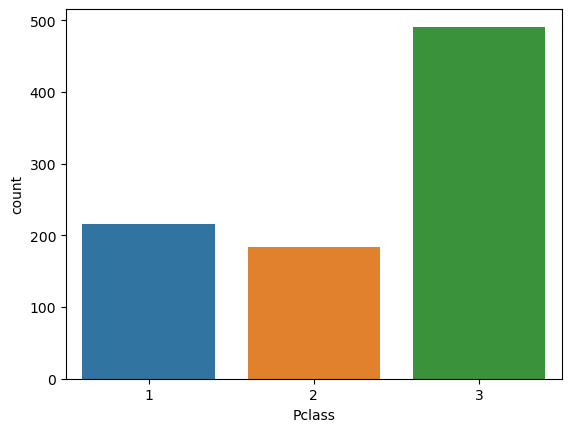

In [2]:
#2.EDA
import seaborn as sns
sns.countplot(X_train,x='Pclass')

'''
def graph(variable):
    survived = df[df['Survived']==1][variable].value_counts()
    dead = df[df['Survived']==0][variable].value_counts()
    result = pd.DataFrame([survived,dead])
    result.index = ['Survived','Dead']
    result.T.plot(kind='bar', color=['skyblue','gray'], rot=0, figsize=(8,6))
'''

'''
import matplotlib.pyplot as plt

print(X_train.info())
X_train[['Fare']].boxplot()
plt.show()
'''

In [3]:
#3.불필요한 컬럼 제거
print(X_train.info())
print(X_train['Fare'].unique())
print(X_train.select_dtypes('object').nunique())

X_train = X_train.drop(columns=['PassengerId','Name','Ticket','Cabin'])
X_test = X_test.drop(columns=['PassengerId','Name','Ticket','Cabin'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB
None
[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.

In [4]:
#4.결측치 처리
print(X_train.info())
print(X_test.info())

X_train['Age'] = X_train['Age'].fillna(X_train['Age'].mean())
X_test['Age'] = X_test['Age'].fillna(X_train['Age'].mean())

X_train['Embarked'] = X_train['Embarked'].fillna(X_train['Embarked'].value_counts().idxmax())
X_test['Embarked'] = X_test['Embarked'].fillna(X_train['Embarked'].value_counts().idxmax())

X_train['Fare'] = X_train['Fare'].fillna(X_train['Fare'].mean())
X_test['Fare'] = X_test['Fare'].fillna(X_train['Fare'].mean())

print(X_train.isna().sum())
print(X_test.isna().sum())
print(y_train.isna().sum())

'''
#추가.이상치 처리
sns.boxplot(data=X_train['Age'])
Q1 = X_train['Age'].quantile(0.25)
Q3 = X_train['Age'].quantile(0.75)
IQR = Q3-Q1

X_train.loc[(X_train['Age']<Q1-1.5*IQR) | (X_train['Age']>Q3+1.5*IQR),'Age']=X_train['Age'].mean()
X_test.loc[(X_test['Age']<Q1-1.5*IQR) | (X_test['Age']>Q3+1.5*IQR),'Age']=X_test['Age'].mean()
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), in

"\n#추가.이상치 처리\nsns.boxplot(data=X_train['Age'])\nQ1 = X_train['Age'].quantile(0.25)\nQ3 = X_train['Age'].quantile(0.75)\nIQR = Q3-Q1\n\nX_train.loc[(X_train['Age']<Q1-1.5*IQR) | (X_train['Age']>Q3+1.5*IQR),'Age']=X_train['Age'].mean()\nX_test.loc[(X_test['Age']<Q1-1.5*IQR) | (X_test['Age']>Q3+1.5*IQR),'Age']=X_test['Age'].mean()\n"

In [5]:
#5.인코딩
X_train = pd.get_dummies(X_train,columns=['Sex','Embarked','Pclass'])
X_test = pd.get_dummies(X_test,columns=['Sex','Embarked','Pclass'])
print(X_train.info())
print(X_test.info())

X_train_enc = X_train.select_dtypes('bool').astype('int')
X_test_enc = X_test.select_dtypes('bool').astype('int')

print(X_train_enc.info())
print(X_test_enc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         891 non-null    float64
 1   SibSp       891 non-null    int64  
 2   Parch       891 non-null    int64  
 3   Fare        891 non-null    float64
 4   Sex_female  891 non-null    bool   
 5   Sex_male    891 non-null    bool   
 6   Embarked_C  891 non-null    bool   
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
 9   Pclass_1    891 non-null    bool   
 10  Pclass_2    891 non-null    bool   
 11  Pclass_3    891 non-null    bool   
dtypes: bool(8), float64(2), int64(2)
memory usage: 34.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         418 non-null    float64
 1   SibSp       418 non-nul

In [6]:
#6.스케일링
from sklearn.preprocessing import StandardScaler

X_train_num = X_train.select_dtypes(exclude='bool').copy()
X_test_num = X_test.select_dtypes(exclude='bool').copy()

scale = StandardScaler().fit(X_train_num)

X_train_std = scale.transform(X_train_num)
X_test_std = scale.transform(X_test_num)

X_train_std = pd.DataFrame(X_train_std,columns=['Age','SibSp','Parch','Fare'])
X_test_std = pd.DataFrame(X_test_std,columns=['Age','SibSp','Parch','Fare'])

X_train = pd.concat([X_train_std,X_train_enc],axis=1)
X_test = pd.concat([X_test_std,X_test_enc],axis=1)

In [7]:
#7.특성 선택
# SibSp + Parch = 동승한 가족 수 "새로운 컬럼을 추가하는 방법도 고려해볼만하다." 
import statsmodels.api as sm 

x = X_train.drop(columns=['Sex_male','Embarked_C','Pclass_2'])
y = y_train

model = sm.Logit(y,x)
model_fit = model.fit()
print(model_fit.summary())

Optimization terminated successfully.
         Current function value: 0.444890
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Thu, 23 May 2024   Pseudo R-squ.:                  0.3319
Time:                        21:01:59   Log-Likelihood:                -396.40
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 3.851e-80
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Age           -0.4902      0.101     -4.851      0.000      -0.688      -0.292
SibSp         -0.3112      0.

In [8]:
#8.데이터 분리하기
x = X_train[['Age','SibSp','Sex_female','Embarked_S','Pclass_3']]
y = y_train
test = X_test[['Age','SibSp','Sex_female','Embarked_S','Pclass_3']]

from sklearn.model_selection import train_test_split

X1, X2, y1, y2 = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=999)

In [57]:
#9.모델 학습 및 예측
from sklearn.linear_model import LogisticRegression

#LogisticRegression
model_lr = LogisticRegression(random_state=999)
model_lr.fit(X1,y1)
y_predict_lr = model_lr.predict(X2)

In [59]:
#10.평가
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_curve, roc_auc_score

print(confusion_matrix(y2,y_predict_lr)) #혼동행렬
print(accuracy_score(y2,y_predict_lr)) #정확도
print(f1_score(y2,y_predict_lr)) #F1-스코어

probas_lr = model_lr.predict_proba(X2)
print(roc_auc_score(y2,probas_lr[:,1])) #roc점수

'''
# roc_curve 시각화
import matplotlib.pyplot as plt
fpr, tpr, thresholds = roc_curve(y2, probas[:,1])
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots()
fig.set_size_inches(4.8, 5)
ax.step(fpr, tpr, 'gray')
ax.fill_between(fpr, tpr, 0, color='skyblue', alpha=0.8)
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_facecolor('xkcd:white')
plt.show()
'''

'''
# confusion_matrix 시각화
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y2,y_predict)
#plt.figure(figsize=(5,4))
ax = sns.heatmap(cm,annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real data')
plt.show()
print(cm)
'''

[[156  15]
 [ 39  58]]
0.7985074626865671
0.6823529411764705
0.8253752939048652


"\n# confusion_matrix 시각화\nimport seaborn as sns\nimport matplotlib.pyplot as plt\ncm = confusion_matrix(y2,y_predict)\n#plt.figure(figsize=(5,4))\nax = sns.heatmap(cm,annot=True)\nplt.xlabel('Prediction')\nplt.ylabel('Real data')\nplt.show()\nprint(cm)\n"

In [11]:
#11.제출
model = LogisticRegression()
model.fit(x,y)
y_predict = model.predict(test)

obj = {'PassengerId':PassengerId,'Survived':y_predict}
result = pd.DataFrame(obj)
result.to_csv('result/result.csv', index = False)